In [ ]:
import gymnasium as gym
from gymnasium import spaces
import numpy as np
from myQwordleEnv import WordleMetaEnv
from stable_baselines3 import PPO
from tqdm import tqdm
import matplotlib.pyplot as plt

In [23]:
model = PPO.load("meta_ppo_wordle.zip")

In [24]:
model

100%|██████████| 2309/2309 [00:12<00:00, 190.80it/s]


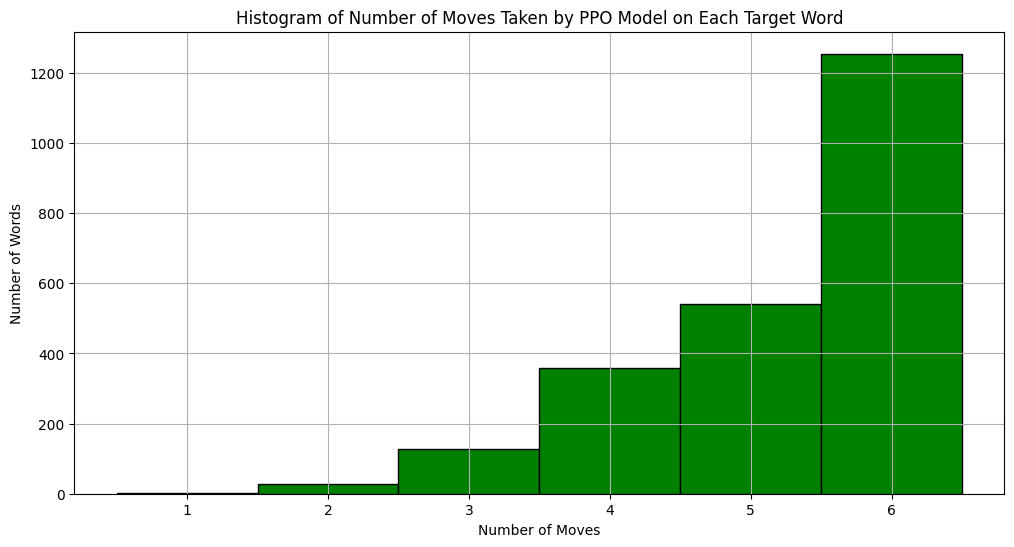

In [ ]:
def run_episode_for_target(target, model):
    env = WordleMetaEnv()
    env.reset()
    env.env.target_word = target  
    env.env.attempts = 0  
    env.env.guessed_words = []
    
    done = False
    state = (0, 0, 0)
    moves = 0

    while not done:

        action, _states = model.predict(state, deterministic=True)
        state, reward, done = env.step(action)
        moves += 1
    
    return moves
with open('target_words.txt', 'r') as f:
    target_words = f.read().splitlines()
moves_list = []
for word in tqdm(target_words):
    moves = run_episode_for_target(word, model)
    moves_list.append(moves)
plt.figure(figsize=(12, 6))
plt.hist(moves_list, bins=range(1, max(moves_list) + 2), edgecolor='black', color='green', align='left')
plt.xlabel("Number of Moves")
plt.ylabel("Number of Words")
plt.title("Histogram of Number of Moves Taken by PPO Model on Each Target Word")
plt.xticks(range(1, max(moves_list) + 1))
plt.grid(True)
plt.show()

In [26]:
print(f"Average number of moves: {np.mean(moves_list)}")

Average number of moves: 5.241229969683846
